In [47]:
'''user_reviews.csv: contains 100 reviews for each app, 
The text in each review has been pre-processed and attributed with three new features:
Sentiment (Positive, Negative or Neutral), 
Sentiment Polarity and Sentiment Subjectivity.
'''

'user_reviews.csv: contains 100 reviews for each app, \nThe text in each review has been pre-processed and attributed with three new features:\nSentiment (Positive, Negative or Neutral), \nSentiment Polarity and Sentiment Subjectivity.\n'

In [48]:
#apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

In [49]:
# Read in dataset
import pandas as pd
apps = pd.read_csv('E://Google play project/apps.csv')

# Column names to check for duplication
column_names = ['App']
duplicates = apps.duplicated(subset = column_names, keep = False)
# Output duplicate values
apps[duplicates].sort_values(by = 'App')

# Drop duplicates
#apps = apps_with_duplicates.drop_duplicates(inplace=True)

# Print the total number of apps
print('Total number of apps in the dataset = ', 9659)

# Print a concise summary of apps dataframe
display(apps.info())

#print first five rows
display(apps.head())
# Have a look at a random sample of n rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


None

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4342,5297,Weapons simulator AK-47,FAMILY,4.1,21,26.0,"5,000+",Free,0,Everyone,Simulation,"May 15, 2017",1,4.1 and up
9090,10260,Barcelona Wallpaper HD,PERSONALIZATION,4.5,93,5.7,"10,000+",Free,0,Everyone,Personalization,"February 28, 2018",1.1,4.1 and up
8973,10134,EZ File Manager(Root Explorer),PRODUCTIVITY,3.5,626,1.2,"100,000+",Free,0,Everyone,Productivity,"June 23, 2015",1.1,3.2 and up
2262,2890,Camera FV-5 Lite,PHOTOGRAPHY,4.0,130081,5.6,"10,000,000+",Free,0,Everyone,Photography,"November 10, 2017",3.31.4,4.0 and up
1548,1956,Dragon Hills,GAME,4.5,354373,66.0,"10,000,000+",Free,0,Everyone 10+,Action,"October 12, 2017",1.2.7,4.1 and up


In [50]:
''' 
Data cleaning 
The four features that we will be working with most frequently henceforth are Installs, Size, Rating and Price. 
The info() function (from the previous task) told us that Installs and Price columns
are of type object and not int64 or float64 as we would expect.
This is because the column contains some characters more than just [0,9] digits.
Ideally, we would want these columns to be numeric as their name suggests.
Hence, we now proceed to data cleaning and prepare our data to be consumed in our analyis later.
Specifically, the presence of special characters (, $ +) in the Installs and Price columns
make their conversion to a numerical data type difficult.
'''

' \nData cleaning \nThe four features that we will be working with most frequently henceforth are Installs, Size, Rating and Price. \nThe info() function (from the previous task) told us that Installs and Price columns\nare of type object and not int64 or float64 as we would expect.\nThis is because the column contains some characters more than just [0,9] digits.\nIdeally, we would want these columns to be numeric as their name suggests.\nHence, we now proceed to data cleaning and prepare our data to be consumed in our analyis later.\nSpecifically, the presence of special characters (, $ +) in the Installs and Price columns\nmake their conversion to a numerical data type difficult.\n'

In [51]:
# List of characters to remove
chars_to_remove = ['+','$']
# List of column names to clean
cols_to_clean = ['Installs','Price']

# Replace each character with an empty string
apps["Installs"] = apps["Installs"].str.replace("+", "")
apps["Installs"] = apps["Installs"].str.replace(",", "")
apps["Price"] = apps["Price"].str.replace("$", "")
# Convert col to numeric
apps['Installs'] = pd.to_numeric(apps['Installs']) 
apps['Price'] = pd.to_numeric(apps['Price']) 
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.0+ MB


In [52]:
# Print the total number of unique categories
categories=apps['Category'].unique()
print(categories)
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Number of categories =  33


In [53]:
# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_categ = apps['Category'].value_counts().sort_values(ascending = False)
print(num_apps_in_categ)

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


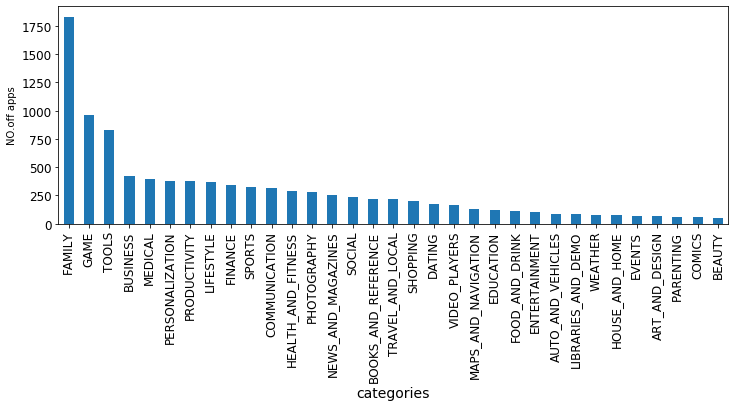

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
num_apps_in_categ.plot(kind='bar')
plt.xlabel("categories",fontsize=14)
plt.ylabel("NO.off apps")
plt.tick_params(labelsize=12)
plt.show()


In [55]:
'''
 Distribution of app ratings:
After having witnessed the market share for each category of apps,
let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability,
conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17.
The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only 
a few exceptions in the low-rated apps.
''' 

"\n Distribution of app ratings:\nAfter having witnessed the market share for each category of apps,\nlet's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability,\nconversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.\n\nFrom our research, we found that the average volume of ratings across all app categories is 4.17.\nThe histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only \na few exceptions in the low-rated apps.\n"

In [56]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

Average app rating =  4.173243045387998


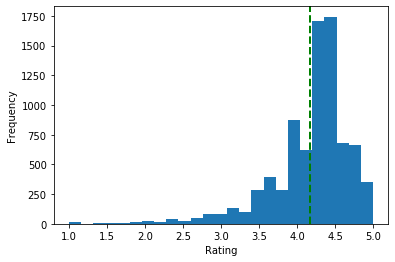

In [57]:

apps['Rating'].plot(kind='hist',bins=25)
plt.axvline(avg_app_rating, color='green', linewidth=2 , linestyle='--')
plt.xlabel("Rating")
plt.show()

In [58]:
'''
Size and price of an app :
How can we effectively come up with strategies to size and price our app?

Does the size of an app affect its rating?
Do users really care about system-heavy apps or do they prefer light-weighted apps?
Does the price of an app affect its rating?
Do users always prefer free apps over paid apps?
'''

'\nSize and price of an app :\nHow can we effectively come up with strategies to size and price our app?\n\nDoes the size of an app affect its rating?\nDo users really care about system-heavy apps or do they prefer light-weighted apps?\nDoes the price of an app affect its rating?\nDo users always prefer free apps over paid apps?\n'

In [59]:
# Filter rows where both Rating and Size values are not null
apps_Non_Null = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

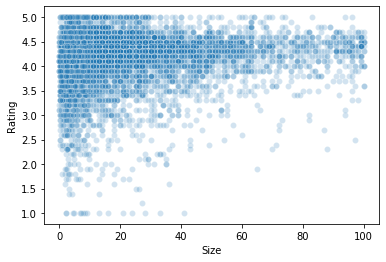

In [60]:
# Plot size vs. rating
sns.scatterplot(x ='Size', y ='Rating', data = apps_Non_Null,alpha=0.2)
plt.show()


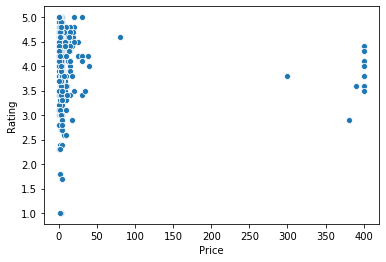

In [61]:
# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_Non_Null[apps_Non_Null['Type'] == 'Paid']

# Plot price vs. rating
sns.scatterplot(x = 'Price', y ='Rating', data = paid_apps)
plt.show()

In [62]:
6. Relation between app category and app price
So now comes the hard part. How are companies and developers supposed to make ends meet?
What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features,
complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app.
It is important to consider the willingness of your customer to pay for your app.
A wrong price could break the deal before the download even happens.
Potential customers could be turned off by what they perceive to be a shocking cost,
or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily,
like the calculator app, should probably be kept free. However,
it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients.
Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80!
All game apps are reasonably priced below $20.

SyntaxError: invalid syntax (<ipython-input-62-1f98f7532058>, line 1)

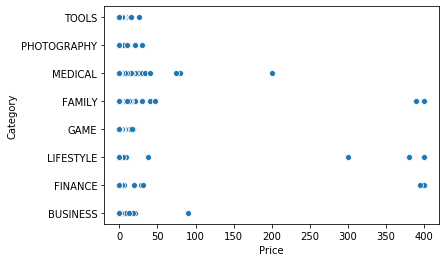

In [77]:

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

sns.scatterplot(x="Price",y="Category",data= popular_app_cats)
plt.show()

In [71]:
# Apps whose Price is greater than 200
apps_above_200=popular_app_cats[popular_app_cats['Price']>200]
Category_App_Price = apps_above_200[['Category', 'App', 'Price']]
Category_App_Price

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


In [ ]:
7. Filter out "junk" apps
It looks like a bunch of the really expensive apps are "junk" apps.
That is, apps that don't really have a purpose.
Some app developer may create an app called I Am Rich Premium or most expensive app (H)
just for a joke or to test their app development skills. Some developers even do this with malicious intent
and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization. The distribution of apps under $20 becomes clearer.

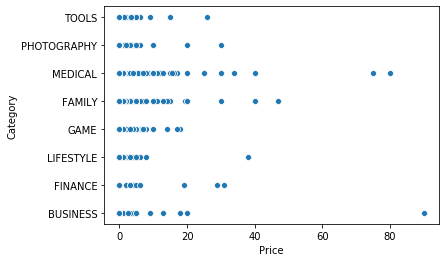

In [76]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

# Examine price vs category with the authentic apps
sns.scatterplot(x="Price",y="Category",data= apps_under_100)
plt.show()

In [ ]:
8. Popularity of paid apps vs free apps
For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription.
Let's focus on free and paid apps only. Some characteristics of free apps are:

Free to download.
Main source of income often comes from advertisements.
Often created by companies that have other products and the app serves as an extension of those products.
Can serve as a tool for customer retention, communication, and customer service.
Some characteristics of paid apps are:

Users are asked to pay once for the app to download and use it.
The user can't really get a feel for the app before buying it.

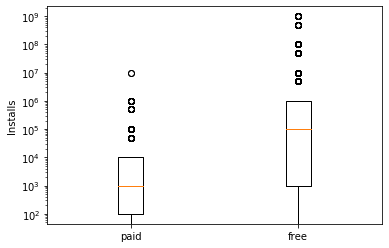

In [98]:
# Data for paid apps
paid=apps[apps['Type'] == 'Paid']
# Data for free apps
free=apps[apps['Type'] == 'Free']


fig, ax=plt.subplots()
ax.boxplot([paid['Installs'],free['Installs']])
ax.set_yscale("log")
ax.set_xticklabels(["paid", "free"])
ax.set_ylabel("Installs")
plt.show()

In [ ]:
9. Sentiment analysis of user reviews¶
Mining user review data to determine how people feel about your product, brand,
or service can be done using a technique called sentiment analysis.
User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app.
For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. 
Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

By plotting sentiment polarity scores of user reviews for paid and free apps,
we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis.
Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e.,
paid apps being of higher quality than free apps on average.
The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In this notebook, we analyzed over ten thousand apps from the Google Play Store.
We can use our findings to inform our decisions should we ever wish to create an app ourselves.

In [105]:
# Load user_reviews.csv
reviews_df = pd.read_csv('E://Google play project/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 61555
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              35929 non-null  int64  
 1   App                     35929 non-null  object 
 2   Category                35929 non-null  object 
 3   Rating                  35929 non-null  float64
 4   Reviews                 35929 non-null  int64  
 5   Size                    24069 non-null  float64
 6   Installs                35929 non-null  int64  
 7   Type                    35929 non-null  object 
 8   Price                   35929 non-null  float64
 9   Content Rating          35929 non-null  object 
 10  Genres                  35929 non-null  object 
 11  Last Updated            35929 non-null  object 
 12  Current Ver             35929 non-null  object 
 13  Android Ver             35929 non-null  object 
 14  Translated_Review       35929 non-null

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

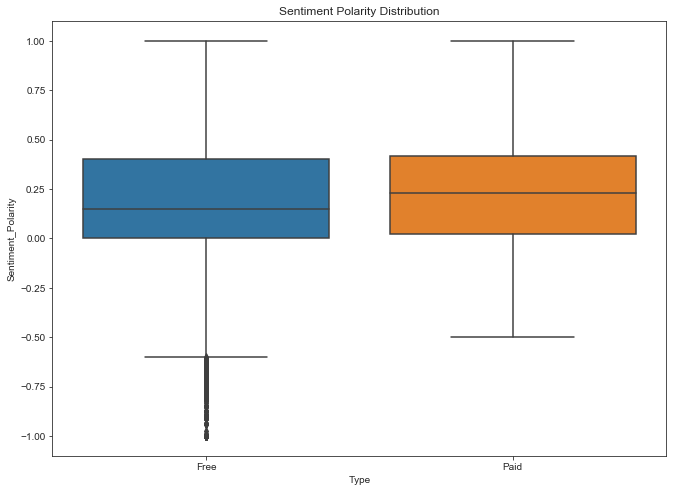

In [107]:
# User review sentiment polarity for paid vs. free apps
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')